# Taking a closer look at our data
So far we have the following data:
* Meteorological data for the first day of the fire: temperatures, wind, humidity
* Historical meteorlogical data: sum of precipitation and snow for the 6 months preceding to the fire
* Land cover category for wildfire location  

Are there any patterns we should be aware of?

In [1]:
# Libraries import
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import of the wildfires data
fires = pd.read_csv('../../data/cleaned/wildfires_all.csv')
fires.head(2)

,X,Y,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireDiscoveryDateTime,IncidentTypeCategory,IncidentTypeKind,...,InitialLongitude,IrwinID,LocalIncidentIdentifier,POOCounty,POODispatchCenterID,POOFips,POOState,UniqueFireIdentifier,total_acres,fire_id
0,-111.348611,33.195755,2020-07-23 05:29:59+00:00,2020-07-23 05:29:59+00:00,8.0,2.5,Human,2020-07-22 21:51:00+00:00,WF,FI,...,-111.348700,{951823FA-0B72-4295-87C8-E042D602324E},1450,Pinal,AZTDC,4021,US-AZ,2020-AZA3S-001450,10.5,0
1,-115.748812,40.617506,2020-08-03 23:00:00+00:00,2020-09-02 15:00:00+00:00,5985.9,5.0,Natural,2020-07-19 23:00:00+00:00,WF,FI,...,-115.719777,{91E0CBAB-A24E-4590-B6C6-2B4A46907E8A},10145,Elko,NVEIC,32007,US-NV,2020-NVECFX-010145,5990.9,1


### Looking at fire locations

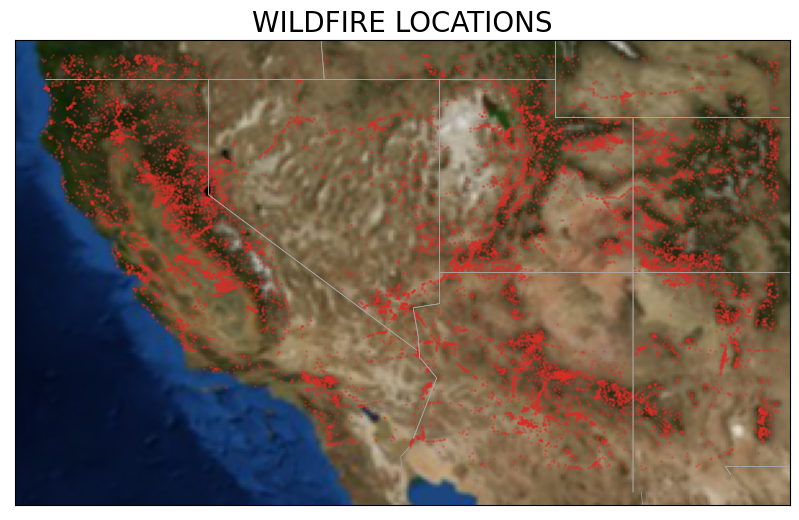

In [3]:
# Plotting a map in a default projection
plt.figure(figsize = (10,10));

m = Basemap(llcrnrlon=-125, llcrnrlat=31, urcrnrlon=-105, urcrnrlat=43) # extent setting
m.bluemarble() # background: satellite imagery

m.drawstates(linewidth=0.5, color = 'darkgrey') # US states boundaries

# Adding wildfires locations to a basemap
m.scatter(
    x=fires['X'], 
    y=fires['Y'], 
    alpha=0.3,
    marker = 'o',
    color = '#D62F29',
    s = 1
)

plt.title('WILDFIRE LOCATIONS', size = 20) # title

plt.savefig('../../public/visuals/wildfire_all_locations.png', dpi = 200); # saving map

We've done some solid cleaning on wildfires dataset to narrow down the scope, so below are locations of fires that we ended up using for modeling.

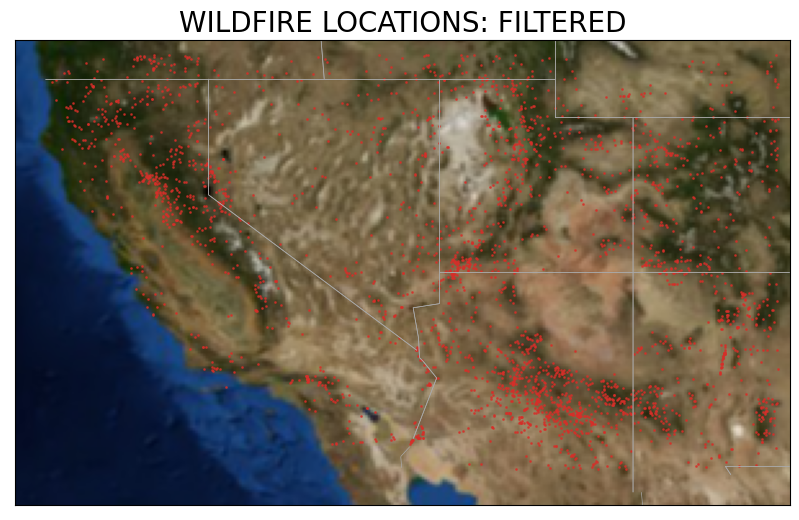

In [4]:
# Import of the filtered wildfires data
fires_filtered = pd.read_csv('../../data/cleaned/wildfires_filtered.csv')

# Plotting a map in a default projection
plt.figure(figsize = (10,10));

m = Basemap(llcrnrlon=-125, llcrnrlat=31, urcrnrlon=-105, urcrnrlat=43) # extent setting
m.bluemarble() # background: satellite imagery

m.drawstates(linewidth=0.5, color = 'darkgrey') # US states boundaries

# Adding wildfires locations to a basemap
m.scatter(
    x=fires_filtered['X'], 
    y=fires_filtered['Y'], 
    alpha=0.7,
    marker = 'o',
    color = '#D62F29',
    s = 1
)

plt.title('WILDFIRE LOCATIONS: FILTERED', size = 20) # title

plt.savefig('../../public/visuals/wildfire_filtered_locations.png', dpi = 200); # saving map

### Looking at fires sizes, duration, and cause

In [7]:
# Converting datetime columns to a proper datetime format
fires['FireDiscoveryDateTime'] = pd.to_datetime(fires['FireDiscoveryDateTime'])
fires['ContainmentDateTime'] = pd.to_datetime(fires['ContainmentDateTime'])
fires['ControlDateTime'] = pd.to_datetime(fires['ControlDateTime'])

## Creating duration in days column
fires['duration'] = fires['ControlDateTime'] - fires['FireDiscoveryDateTime']
fires['duration'] = fires['duration'].apply(lambda x: x.days)

# Calculating total acreage from discovery acres and daily acres
fires['total_acreage'] = fires['DiscoveryAcres'] + fires['DailyAcres']

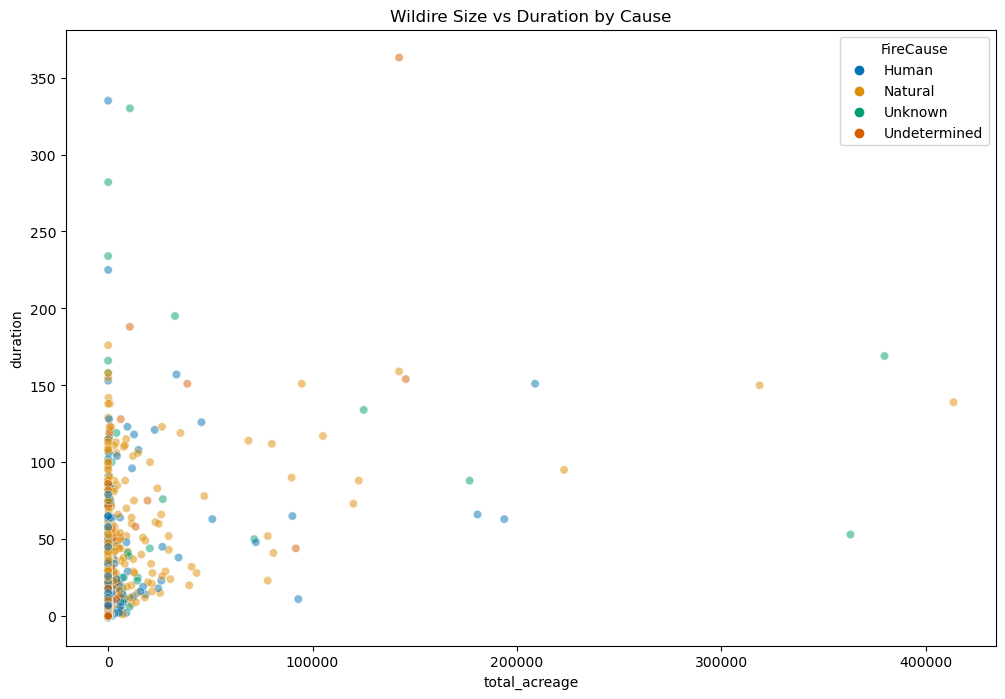

In [15]:
# Plotting wildfires size, duration and cause
plt.figure(figsize = (12,8)) # figure size

sns.scatterplot( # plotting wildfires' size, duration, colored by cause
    data=fires,
    x='total_acreage',
    y='duration',
    hue='FireCause',
    palette = 'colorblind',
    alpha = 0.5
)
plt.title('Wildire Size vs Duration by Cause');

From the scatterplot above, we can clearly see some outliers with enormous acreage burned. We will be removing them during the modeling. For now, I'm going to apply axes limits to look closer at the main part of wildfires' distribution.

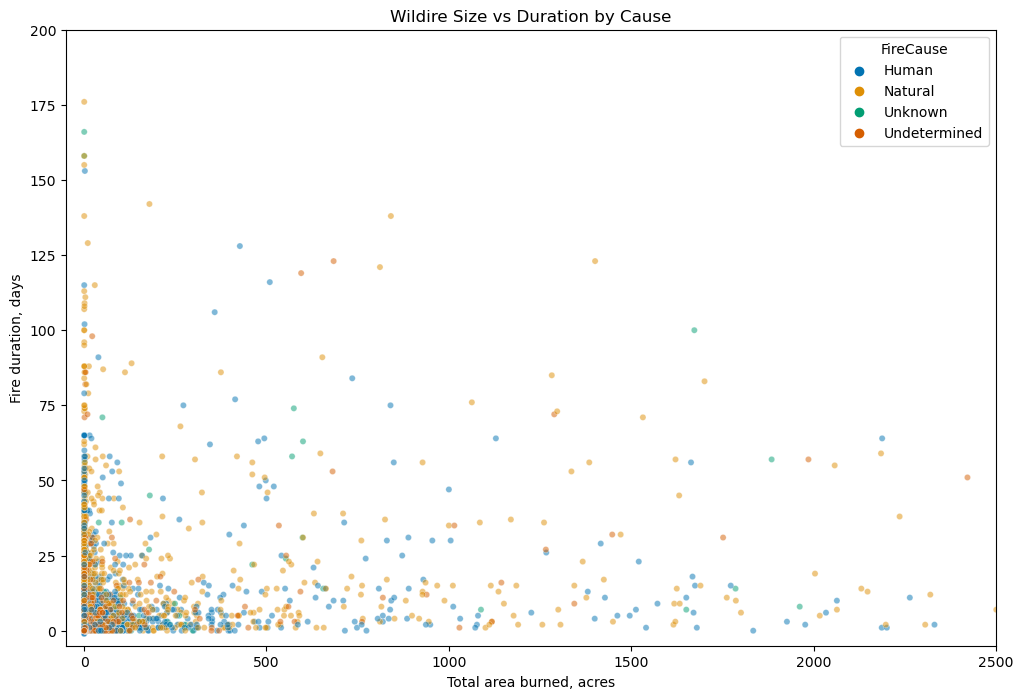

In [44]:
# Plotting wildfires size, duration and cause
plt.figure(figsize = (12,8)) # figure size

sns.scatterplot( # plotting wildfires' size, duration, colored by cause
    data=fires,
    x='total_acreage',
    y='duration',
    hue='FireCause',
    palette = 'colorblind',
    alpha = 0.5,
    s = 20
)
# Limiting extent to remove outliers
plt.xlim(-50, 2500)
plt.ylim(-5, 200)

# Axes and plot titles
plt.xlabel('Total area burned, acres')
plt.ylabel('Fire duration, days')
plt.title('Wildire Size vs Duration by Cause')

plt.savefig('../../public/visuals/wildfire_all_size_vs_duration.png', dpi = 200);

It's hard to tell any patterns from the plot above except the fact that wildfires from the data we got are very different by their nature. Is it different for filtered data?

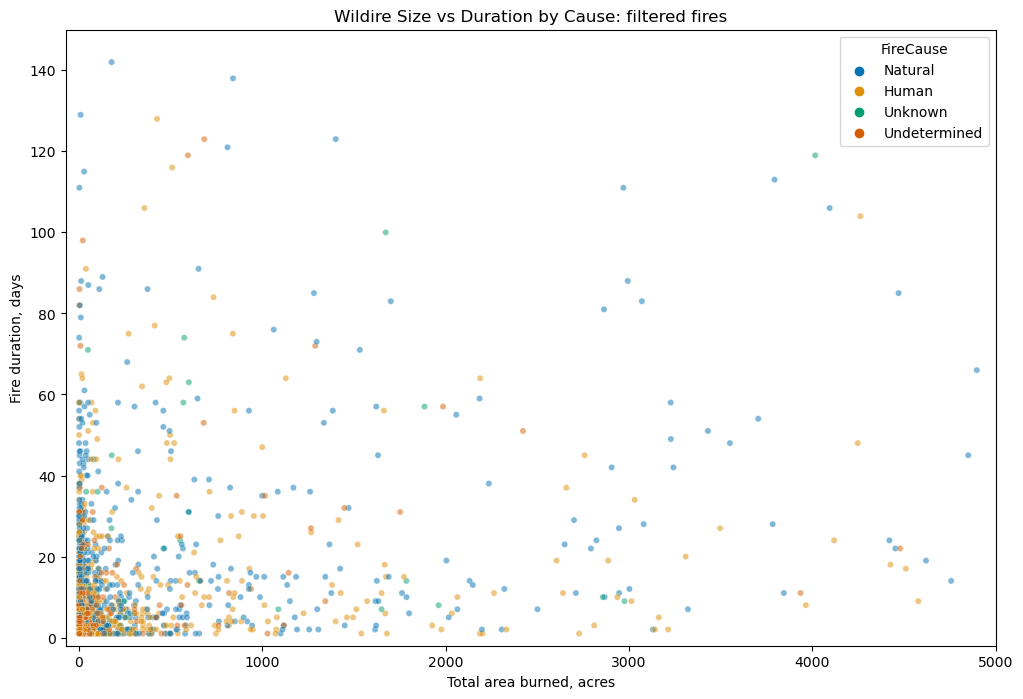

In [42]:
# Repeating the columns creation for fires_filtered dataset
fires_filtered['FireDiscoveryDateTime'] = pd.to_datetime(fires_filtered['FireDiscoveryDateTime'])
fires_filtered['ContainmentDateTime'] = pd.to_datetime(fires_filtered['ContainmentDateTime'])
fires_filtered['ControlDateTime'] = pd.to_datetime(fires_filtered['ControlDateTime'])

## Creating duration in days column
fires_filtered['duration'] = fires_filtered['ControlDateTime'] - fires_filtered['FireDiscoveryDateTime']
fires_filtered['duration'] = fires_filtered['duration'].apply(lambda x: x.days)

# Calculating total acreage from discovery acres and daily acres
fires_filtered['total_acreage'] = fires_filtered['DiscoveryAcres'] + fires_filtered['DailyAcres']

# Plotting FILTERED wildfires size, duration and cause
plt.figure(figsize = (12,8)) # figure size

sns.scatterplot( # plotting wildfires' size, duration, colored by cause
    data=fires_filtered,
    x='total_acreage',
    y='duration',
    hue='FireCause',
    palette = 'colorblind',
    alpha = 0.5,
    s = 20
)
# Limiting extent to remove outliers
plt.xlim(-70, 5000)
plt.ylim(-2, 150)

# Axes and plot titles
plt.xlabel('Total area burned, acres')
plt.ylabel('Fire duration, days')
plt.title('Wildire Size vs Duration by Cause: filtered fires')

plt.savefig('../../public/visuals/wildfire_filtered_size_vs_duration.png', dpi = 200);

Nothing changed in patterns - there's still no correlation between cause, size and duration for even 'non-tiny' fires.

### Timeseries